<AxesSubplot:xlabel='year'>

Text(0.5, 0, 'year')

Text(0, 0.5, 'pricePerMeter')

Text(0.5, 1.0, 'price vs year')

,city,rooms,size,floor,price,pricePerMeter,buildDate,year,Rooms
city,1.000000,0.147230,0.124299,-0.011573,-0.078133,-0.166695,0.144406,0.095179,0.157607
rooms,0.147230,1.000000,0.767659,0.195352,0.400397,-0.032585,0.338529,0.072901,0.989421
size,0.124299,0.767659,1.000000,0.260114,0.517802,-0.059395,0.369645,0.099197,0.765146
floor,-0.011573,0.195352,0.260114,1.000000,0.249324,0.089008,0.309960,0.063798,0.198315
price,-0.078133,0.400397,0.517802,0.249324,1.000000,0.634796,0.264765,0.240878,0.400151
pricePerMeter,-0.166695,-0.032585,-0.059395,0.089008,0.634796,1.000000,0.088372,0.259988,-0.031991
buildDate,0.144406,0.338529,0.369645,0.309960,0.264765,0.088372,1.000000,0.166312,0.344341
year,0.095179,0.072901,0.099197,0.063798,0.240878,0.259988,0.166312,1.000000,0.081335
Rooms,0.157607,0.989421,0.765146,0.198315,0.400151,-0.031991,0.344341,0.081335,1.000000


ValueError: setting an array element with a sequence.

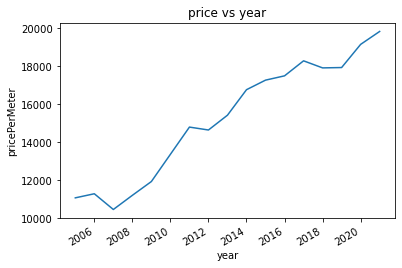

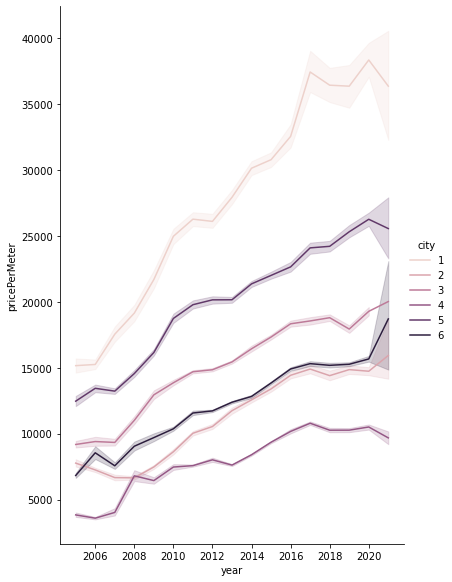

In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
import csv

import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
color = sns.color_palette()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor



import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

warnings.simplefilter("ignore")

%matplotlib inline

# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



def load_csv(file_name):
       return pd.read_csv(file_name)

def convert_to_int(val):
    new_val = val.replace(',','').replace('$', '')
    return int(new_val)



file_name = 'scrape.csv'
df = load_csv(file_name)
df_copy = df.copy()

# TAKE THE YEAR OUT OF THE DATE
df_copy[["day", "month", "year"]] = df_copy["date"].str.split("/", expand = True)
del df_copy["date"]
del df_copy["day"]
del df_copy["month"]

#CONVERT TO INT
df_copy['year'] = df_copy['year'].apply(convert_to_int)   
df_copy['price'] = df_copy['price'].apply(convert_to_int)
df_copy['pricePerMeter'] = df_copy['pricePerMeter'].apply(convert_to_int)

#CONVERT STRINGS TO NUMBERS
city_nums = {"city": {"תל אביב יפו": 1,  "אשדוד": 6, "חיפה": 2, "ראשון לציון": 3, "באר שבע": 4, "ירושלים": 5}}
df_copy = df_copy.replace(city_nums)


#CALCULATE AVG BY YEARS OR CITIES AND PRESENT IT
df_by_year = df_copy.groupby("year")["pricePerMeter"].mean()
df_by_year.plot()
plt.xlabel('year')
plt.ylabel('pricePerMeter')
plt.title('price vs year')
plt.gcf().autofmt_xdate()

#CASTING FROM FLOAT TO INT AND ROUND
df_copy['Rooms'] = df_copy['rooms'].apply(lambda x: int(x))

#FIND CORRELATION BETWEEN PRICE AND FLOOR
correlation = df_copy['rooms'].corr(df_copy['pricePerMeter'])
corr = df_copy.corr()
corr.style.background_gradient(cmap='coolwarm')
#correlation


#KEEP ONLY 3 COLUMNS

df_plot = df_copy.copy()
del df_plot["rooms"]
del df_plot["Rooms"]
del df_plot["floor"]
del df_plot["street"]
del df_plot["buildDate"]
del df_plot["size"]
del df_plot["price"]


#SHOW THE INCREASED PRICE OVER THE YEARS
sns.relplot(data=df_plot, x="year", y="pricePerMeter", hue="city",kind="line", height=8, aspect=.7)



df_by_city = df_copy.groupby(["year", "city"])["pricePerMeter"]


year = []
city = [] 
for i in range(2005,2022):
    for j in range(1,7):
        year.append(i)
        city.append(j)

df_try = pd.DataFrame(list(zip(year, city, df_by_city)), columns=["year", "city" , "pricePerMeter"])

df1 = df_try.copy()


for i in range(1,6):
    df1 = df1.loc[df1["city"] != i]

#PREDICT NEXT YEAR PRICE MARKET
y = df_try['pricePerMeter']
X = df_try.drop(['pricePerMeter'], axis = 1)

#X = X[["city","year"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,shuffle=False )


linear = LinearRegression(fit_intercept=False)
linear.fit(X_train, y_train)
# Predicting 
y_pred = linear.predict(X_test)

print(linear.score(y_pred, y_test))
y_pred = pd.DataFrame(y_pred, index = y_test.index, columns=[ 'predPricePerMeter'])

y_pred.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

sns.relplot(data=y_pred, x="year", y='predPricePerMeter', hue="city",kind="line", height=8, aspect=.7)


